### Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Business Objective

1. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

2. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

3. In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

### Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

### Definitions of Churn

#### Revenue based churn
Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

#### Usage based churn
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

### Load Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Common Configurations

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
warnings.filterwarnings("ignore")

### Load Telecome churn dataset

In [3]:
df = pd.read_csv("telecom_churn_data.csv")
df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Data Preperation

In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose =1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
df.describe(include = "all")

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
# Find Missing value percentage
round(100 * df.isnull().sum()/len(df), 2).sort_values( ascending = False)


count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

Columns related to revenue of business have missing value.Instead of dropping rows its better to replace with amount zero or min value

1. total_rech_data_6, total_rech_data_7, total_rech_data_8, total_rech_data_9
2. av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, av_rech_amt_data_9
3. max_rech_data_6, max_rech_data_7, max_rech_data_8, max_rech_data_9
4. count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_2g_9
5. count_rech_3g_6, count_rech_3g_7, count_rech_3g_8, count_rech_3g_9


In [8]:
revenue_recharge_cols = [
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
    'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9'   
    
]

df[revenue_recharge_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,192.600982,200.981292,197.526489,192.734315,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363
std,2.789128,3.031593,3.074987,2.516339,192.646318,196.791224,191.301305,188.400286,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,82.000000,92.000000,87.000000,69.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,154.000000,154.000000,154.000000,164.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,252.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000


In [9]:
df[revenue_recharge_cols] = df[revenue_recharge_cols].apply(lambda col: col.fillna(0))

In [10]:
round(df[revenue_recharge_cols].isnull().sum()/len(df) * 100, 2)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
dtype: float64

### Drive new Feature and Filter High value Customer

In [11]:
# you need to predict churn only for the high-value customers. 
# Define high-value customers as follows: 
# Those who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

# Calculate total data recharge amount
df["total_data_recharge_amount_6"] = df["total_rech_data_6"] * df["av_rech_amt_data_6"]
df["total_data_recharge_amount_7"] = df["total_rech_data_7"] * df["av_rech_amt_data_7"]

# Calculate total recharge amount (data + recharge)
df["total_recharge_amount_6"] = df["total_rech_amt_6"] + df["total_data_recharge_amount_6"]
df["total_recharge_amount_7"] = df["total_rech_amt_7"] + df["total_data_recharge_amount_7"]

# Calculate average for 2 months
df["average_recharge_amount_6_7"] =  ( df["total_recharge_amount_6"] + df["total_recharge_amount_7"]) / 2

# find high value customers
recharge_amount_07 = df["average_recharge_amount_6_7"].quantile(0.7)
print("Recharge amount for 70 percentile: {0}".format(recharge_amount_07))

high_value_customer_df = df[ df["average_recharge_amount_6_7"] >  recharge_amount_07 ]
print("High value customer shape : {0}".format(high_value_customer_df.shape))

Recharge amount for 70 percentile: 478.0
High value customer shape : (29953, 231)


### Tag Churners and Remove attibutes of the churn phase

In [12]:
# Calculate incoming and outgoing minutes of usage for 9th month
high_value_customer_df["total_calls_mou_9"] = high_value_customer_df["total_ic_mou_9"] + high_value_customer_df["total_og_mou_9"]

# calculate data consumption for 9 month
high_value_customer_df['total_data_mb_9'] =  high_value_customer_df["vol_2g_mb_9"] + high_value_customer_df["vol_3g_mb_9"]

def churn(cust):
    return 1 if (cust["total_calls_mou_9"] == 0 and cust["total_data_mb_9"] == 0) else 0

high_value_customer_df['churn'] = high_value_customer_df.apply(lambda cust: churn(cust), axis=1)

# Delete total_calls_mou_9 and total_data_mb_9
high_value_customer_df = high_value_customer_df.drop(["total_calls_mou_9", "total_data_mb_9"], axis=1)
high_value_customer_df["churn"] = high_value_customer_df["churn"].astype("category")

print("Churn Ratio: {}".format(high_value_customer_df.churn.value_counts()*100/high_value_customer_df.shape[0]))

churn_9month_columns =  high_value_customer_df.columns[high_value_customer_df.columns.str.contains("_9")]
print(churn_9month_columns)

high_value_churned_df = high_value_customer_df.drop(churn_9month_columns,axis=1)
print("High Value Churned Customer Shape : {0}".format(high_value_churned_df.shape))

Churn Ratio: 0    91.877274
1     8.122726
Name: churn, dtype: float64
Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g

In [13]:
high_value_churned_df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 178 columns):
mobile_number                   int64
circle_id                       int64
loc_og_t2o_mou                  float64
std_og_t2o_mou                  float64
loc_ic_t2o_mou                  float64
last_date_of_month_6            object
last_date_of_month_7            object
last_date_of_month_8            object
arpu_6                          float64
arpu_7                          float64
arpu_8                          float64
onnet_mou_6                     float64
onnet_mou_7                     float64
onnet_mou_8                     float64
offnet_mou_6                    float64
offnet_mou_7                    float64
offnet_mou_8                    float64
roam_ic_mou_6                   float64
roam_ic_mou_7                   float64
roam_ic_mou_8                   float64
roam_og_mou_6                   float64
roam_og_mou_7                   float64
roam_og_mou_8    

In [14]:
# get list of datetime cols
date_columns =  high_value_churned_df.columns[high_value_churned_df.columns.str.contains("date")]
date_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [15]:
# Find numbers of unique values in a column
skip_cols = []
skip_cols.extend(date_columns)
skip_cols.append('mobile_number')
unique_value_counts = [ (col, len(pd.unique(high_value_churned_df[col])), high_value_churned_df[col].dtype ) for col in high_value_churned_df.columns if col not in skip_cols]
unique_value_counts

[('circle_id', 1, dtype('int64')),
 ('loc_og_t2o_mou', 2, dtype('float64')),
 ('std_og_t2o_mou', 2, dtype('float64')),
 ('loc_ic_t2o_mou', 2, dtype('float64')),
 ('arpu_6', 29029, dtype('float64')),
 ('arpu_7', 29040, dtype('float64')),
 ('arpu_8', 28035, dtype('float64')),
 ('onnet_mou_6', 16873, dtype('float64')),
 ('onnet_mou_7', 16974, dtype('float64')),
 ('onnet_mou_8', 15855, dtype('float64')),
 ('offnet_mou_6', 21199, dtype('float64')),
 ('offnet_mou_7', 21234, dtype('float64')),
 ('offnet_mou_8', 20141, dtype('float64')),
 ('roam_ic_mou_6', 4046, dtype('float64')),
 ('roam_ic_mou_7', 3382, dtype('float64')),
 ('roam_ic_mou_8', 3432, dtype('float64')),
 ('roam_og_mou_6', 4743, dtype('float64')),
 ('roam_og_mou_7', 3989, dtype('float64')),
 ('roam_og_mou_8', 3997, dtype('float64')),
 ('loc_og_t2t_mou_6', 10417, dtype('float64')),
 ('loc_og_t2t_mou_7', 10389, dtype('float64')),
 ('loc_og_t2t_mou_8', 10057, dtype('float64')),
 ('loc_og_t2m_mou_6', 15608, dtype('float64')),
 ('loc_o

In [16]:
# covert to datetime datatype
for col in date_columns:
    high_value_churned_df[col] = pd.to_datetime(high_value_churned_df[col])

In [17]:
# drop columns having unique value as these columns will not provide much information
unique_value_columns = [
    'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6',
    'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
    'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'
    ]

# drop unique value columns
high_value_churned_filtered_df = high_value_churned_df.drop(unique_value_columns, axis=1)
high_value_churned_filtered_df.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_recharge_amount_6,total_data_recharge_amount_7,total_recharge_amount_6,total_recharge_amount_7,average_recharge_amount_6_7,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Na

In [18]:
categorical_columns =  [
    'night_pck_user_6',
    'night_pck_user_7',
    'night_pck_user_8',
    'night_pck_user_9',
    'fb_user_6',
    'fb_user_7',
    'fb_user_8',
    'fb_user_9'
]

categorical_columns

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [19]:
# Amount columns
amount_recharge_columns =  high_value_churned_filtered_df.columns[high_value_churned_filtered_df.columns.str.contains('rech_amt')]
amount_recharge_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

In [20]:
def box_chart(df, col):
    plt.figure(figsize=(20,16))    
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=col+"_6",x="churn",hue="churn", showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=col+"_7",x="churn",hue="churn", showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=col+"_8",x="churn",hue="churn", showfliers=False)
    plt.show()

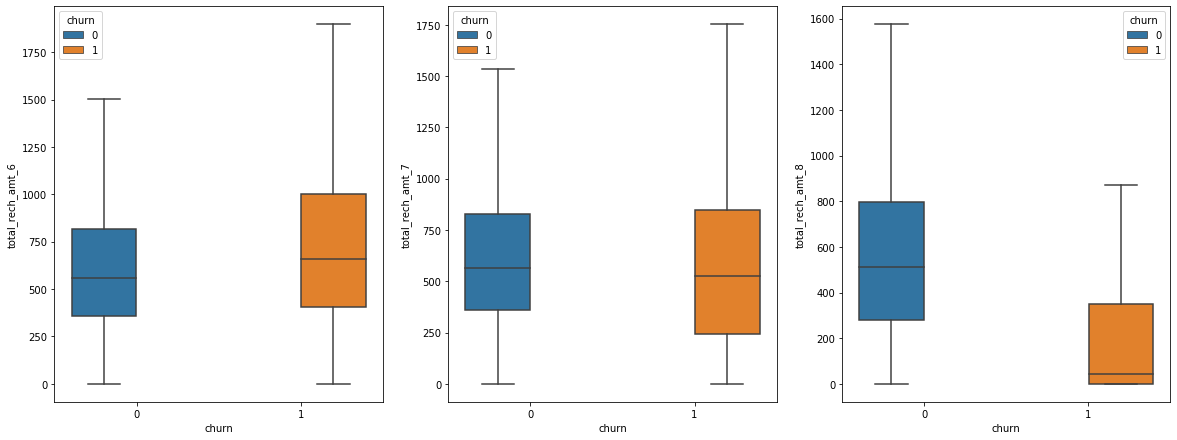

In [21]:
box_chart(high_value_churned_filtered_df, 'total_rech_amt')
# Drop in total recharge amount ( for churned customer- 8th month)

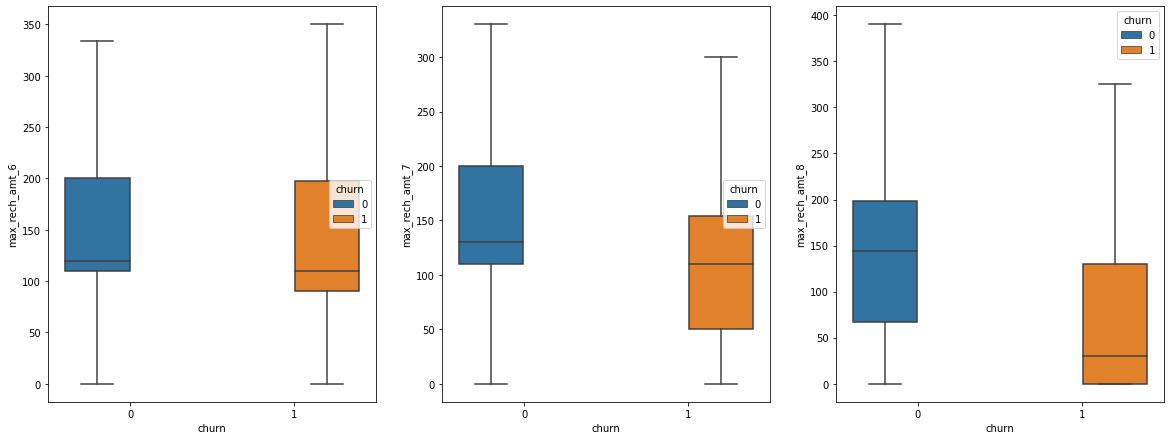

In [22]:
box_chart(high_value_churned_filtered_df, 'max_rech_amt')
# Drop in max recharge amount ( for churned customer- 8th month)

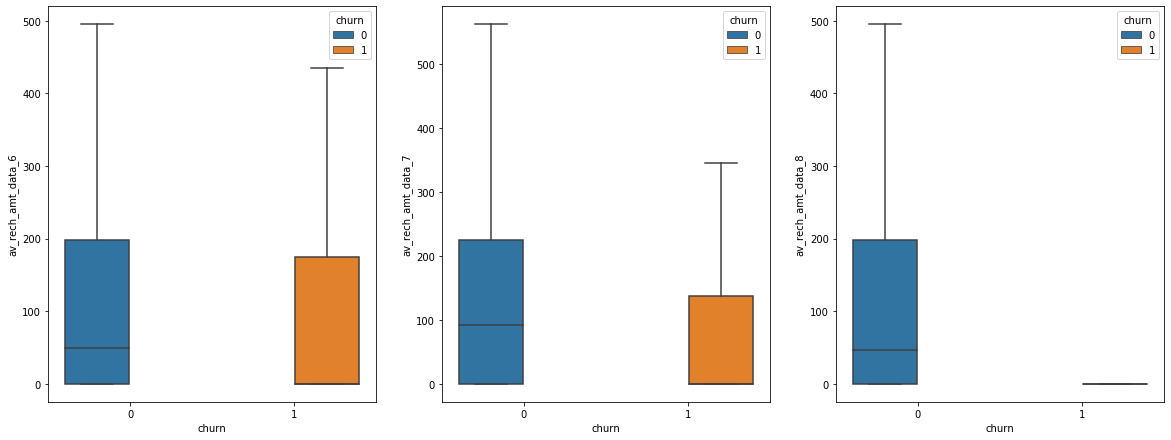

In [23]:
box_chart(high_value_churned_filtered_df, 'av_rech_amt_data')
# Drop in Average recharge amount ( for churned customer- 8th month)

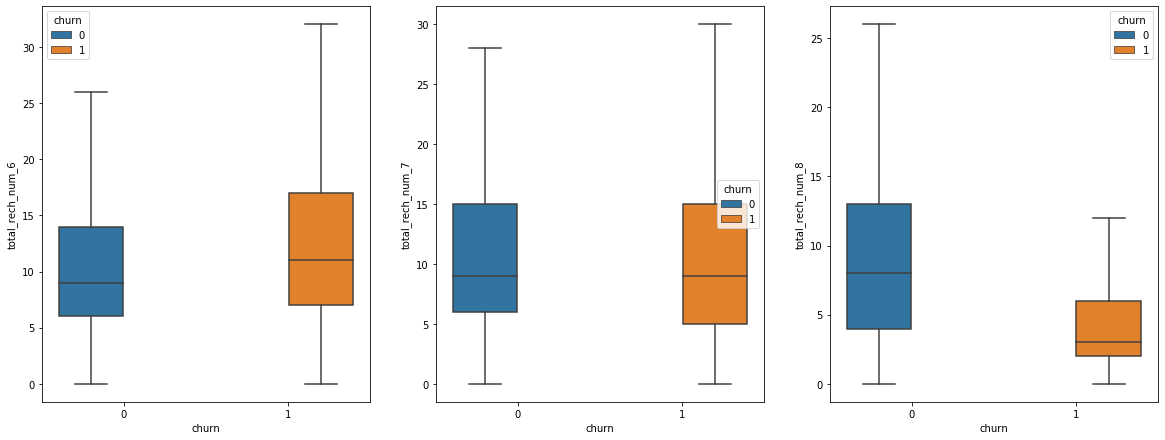

In [24]:
box_chart(high_value_churned_filtered_df, 'total_rech_num')
# Drop in total recharge number ( for churned customer- 8th month)

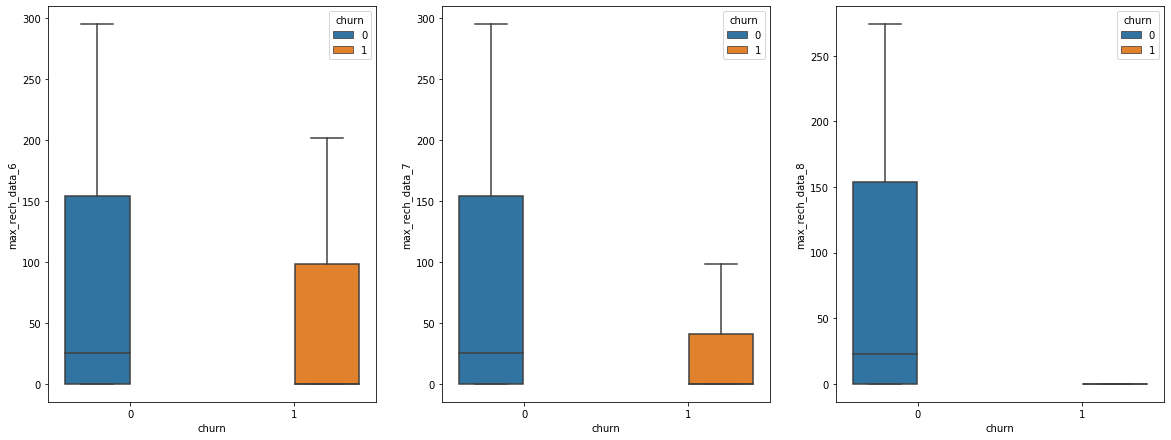

In [25]:
box_chart(high_value_churned_filtered_df, 'max_rech_data')
# Drop in max recharge data amount ( for churned customer- 8th month)

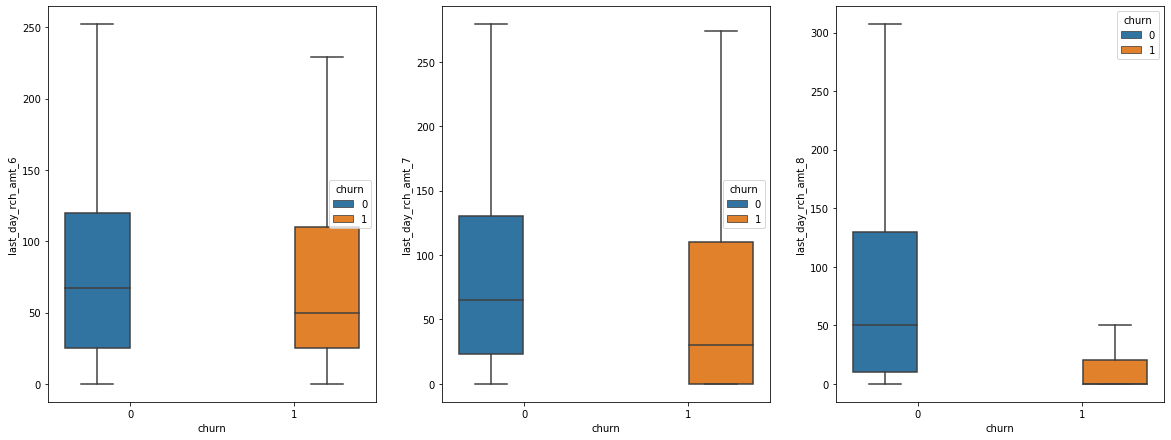

In [26]:
box_chart(high_value_churned_filtered_df, 'last_day_rch_amt')
# Drop in last day recharge amount ( for churned customer- 8th month)

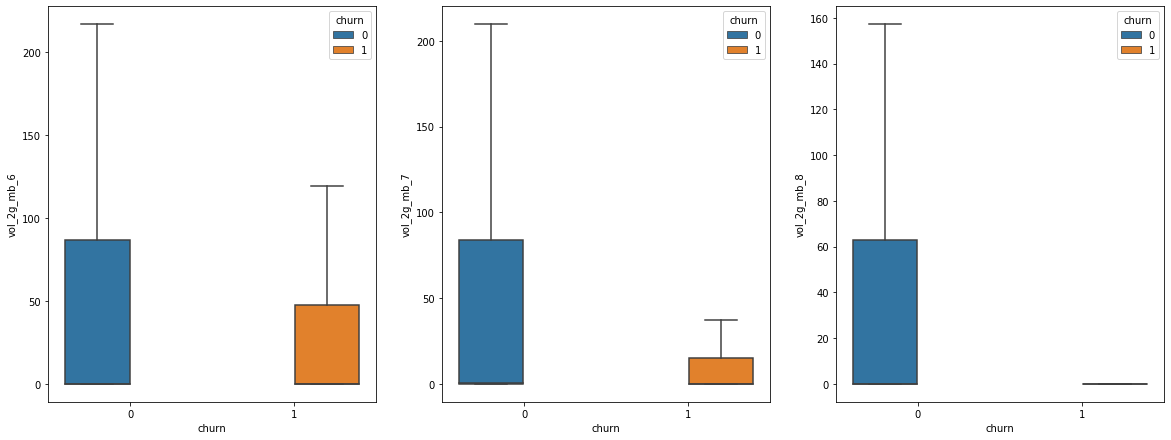

In [27]:
box_chart(high_value_churned_filtered_df, 'vol_2g_mb')
# Drop in vol data 2G ( for churned customer- 8th month)

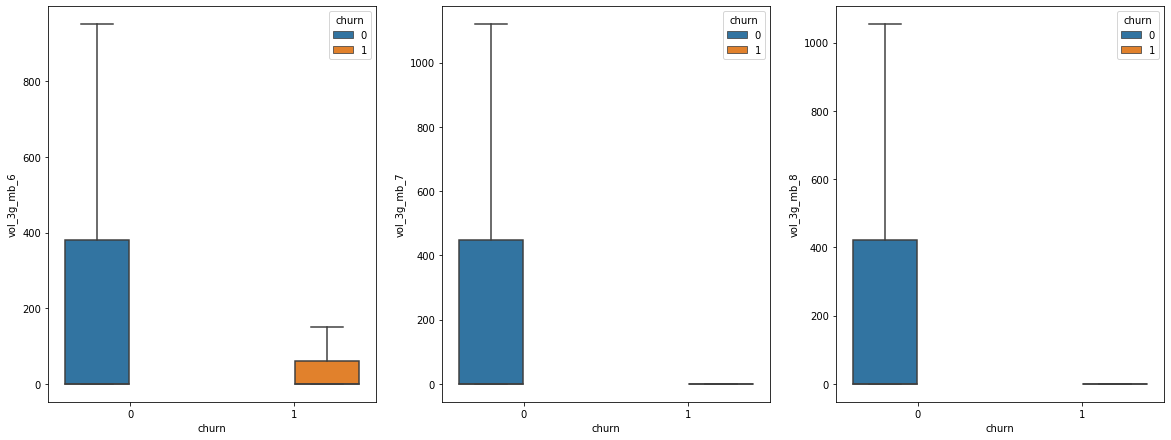

In [28]:
box_chart(high_value_churned_filtered_df, 'vol_3g_mb')
# Drop in vol data 3G ( for churned customer- 8th month)

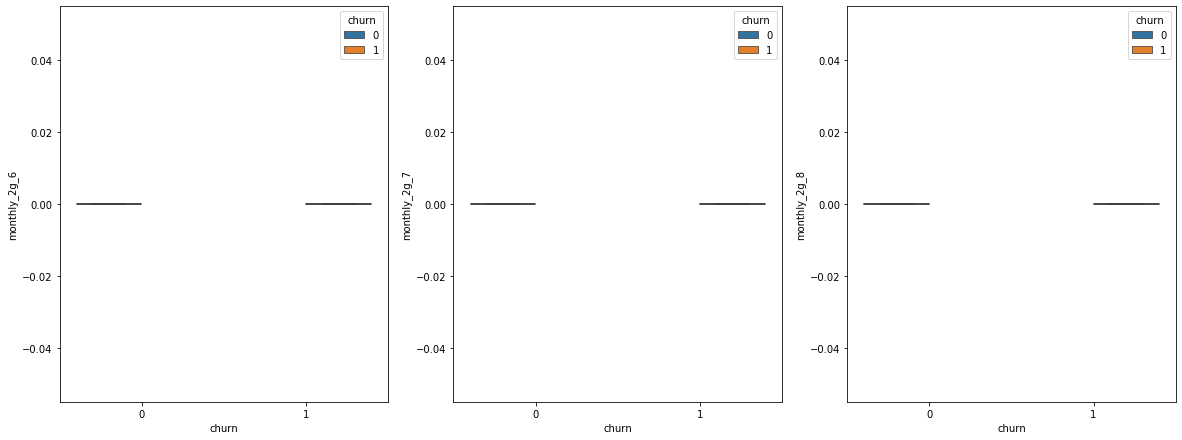

In [29]:
box_chart(high_value_churned_filtered_df, 'monthly_2g')
# Not much insight from this graph

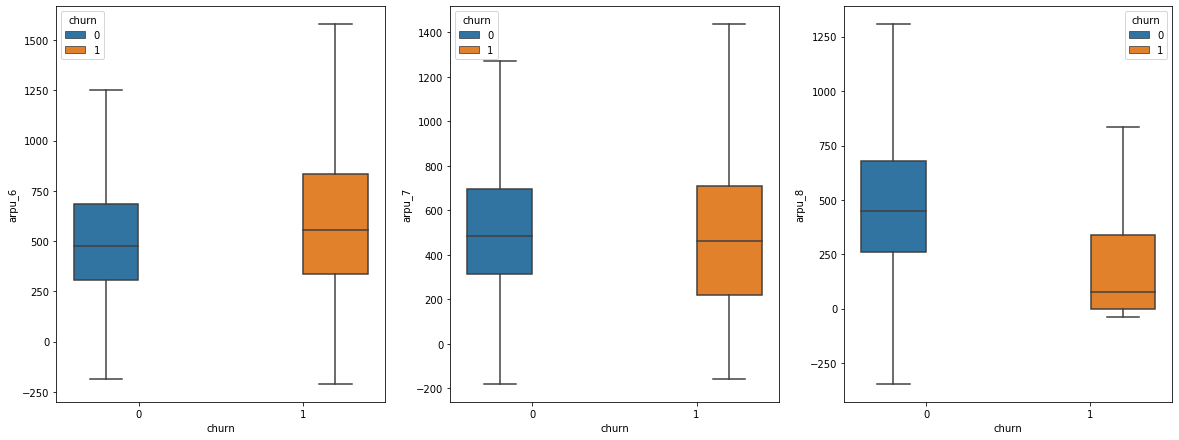

In [30]:
box_chart(high_value_churned_filtered_df, 'arpu')
# Drop in Average Revenue per user ( for churned customer- 8th month)

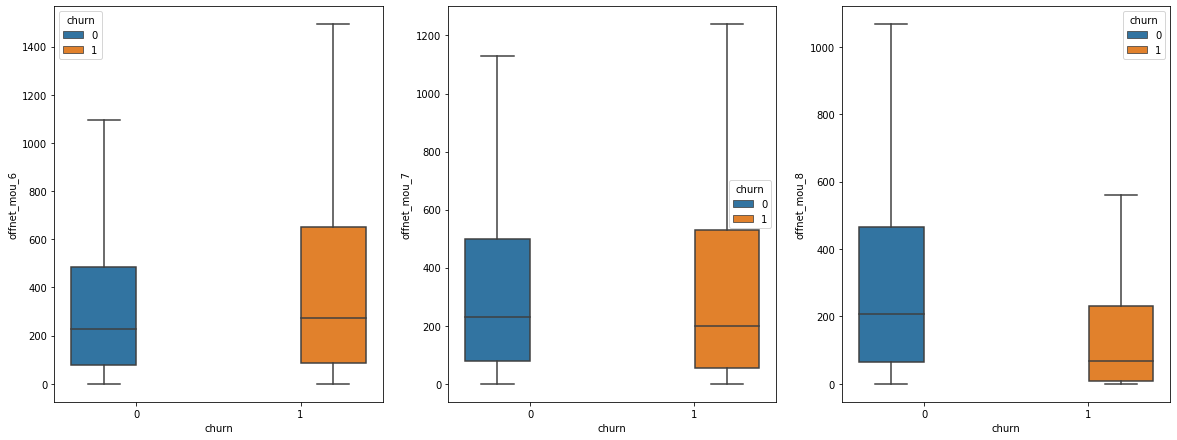

In [31]:
box_chart(high_value_churned_filtered_df, 'offnet_mou')
# Drop in Offnet minutes of usage ( for churned customer- 8th month)

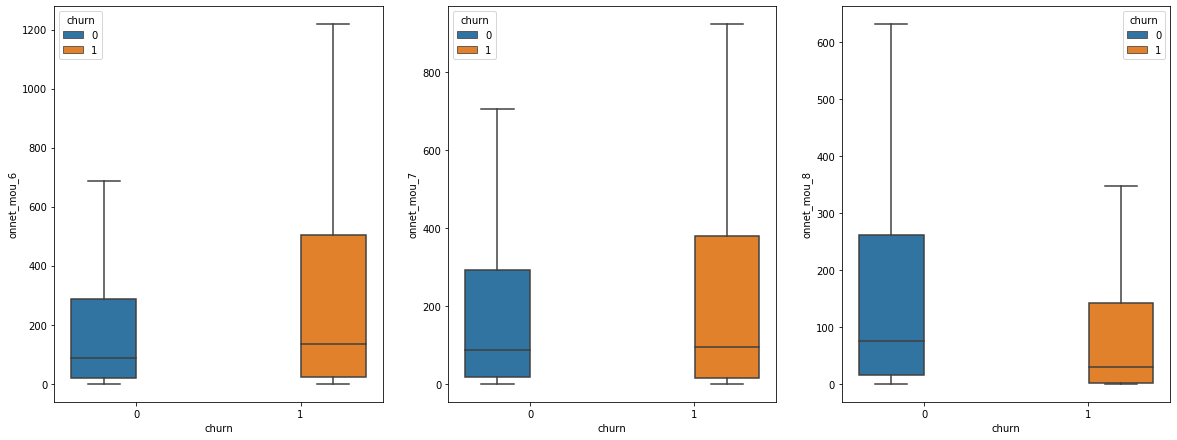

In [32]:
box_chart(high_value_churned_filtered_df, 'onnet_mou')
# Drop in Onnet minutes of usage ( for churned customer- 8th month)

In [33]:
# Drop features 

# total_og_mou, std_og_mou, loc_og_mou - correlated data present in dataset
list_total_og_cols = high_value_churned_filtered_df.columns[high_value_churned_filtered_df.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
high_value_churned_filtered_df.drop(list_total_og_cols,axis=1,inplace=True)

# total_ic_mou|std_ic_mou|loc_ic_mou - correlated data present in dataset
list_total_ic_cols = high_value_churned_filtered_df.columns[high_value_churned_filtered_df.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
high_value_churned_filtered_df.drop(list_total_ic_cols,axis=1,inplace=True)

# Drop temp used column
high_value_churned_filtered_df.drop(["average_recharge_amount_6_7"],axis=1,inplace=True)
high_value_churned_filtered_df.drop(high_value_churned_filtered_df.filter(regex='date_').columns,axis=1,inplace=True)

col_list_to_drop = high_value_churned_filtered_df.filter(regex='_6|_7')
high_value_churned_filtered_df.drop(col_list_to_drop,axis=1,inplace=True)


# Drop feature which has high NaN percentage
col_to_delete_high_nan = [
    'count_rech_2g_8','count_rech_3g_8',
    'arpu_3g_8','arpu_2g_8',
    'night_pck_user_8', 'fb_user_8'    
]
high_value_churned_filtered_df.drop(col_to_delete_high_nan,axis=1,inplace=True)




In [34]:
# Replace NaN values with zero for low null percetnage 
numeric_cols = ['og_others_8', 'ic_others_8']
for ncol in numeric_cols:
    high_value_churned_filtered_df.loc[high_value_churned_filtered_df[ncol].isnull(),ncol]= 0

# Replace NaN values with zero for low null percetnage     
mou_cols = high_value_churned_filtered_df.columns[high_value_churned_filtered_df.columns.str.contains('mou')]
high_value_churned_filtered_df.loc[:,mou_cols] = high_value_churned_filtered_df.loc[:,mou_cols].replace(np.NaN,0)    

### Modeling - PCA

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [36]:
filtered_df = high_value_churned_filtered_df.copy()

Y = filtered_df["churn"]
X = filtered_df.drop(["churn","mobile_number"],axis=1)

scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
filtered_df.isnull().sum()

mobile_number         0
arpu_8                0
onnet_mou_8           0
offnet_mou_8          0
roam_ic_mou_8         0
roam_og_mou_8         0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_8      0
std_og_t2t_mou_8      0
std_og_t2m_mou_8      0
std_og_t2f_mou_8      0
isd_og_mou_8          0
spl_og_mou_8          0
og_others_8           0
loc_ic_t2t_mou_8      0
loc_ic_t2m_mou_8      0
loc_ic_t2f_mou_8      0
std_ic_t2t_mou_8      0
std_ic_t2m_mou_8      0
std_ic_t2f_mou_8      0
spl_ic_mou_8          0
isd_ic_mou_8          0
ic_others_8           0
total_rech_num_8      0
total_rech_amt_8      0
max_rech_amt_8        0
last_day_rch_amt_8    0
total_rech_data_8     0
max_rech_data_8       0
av_rech_amt_data_8    0
vol_2g_mb_8           0
vol_3g_mb_8           0
monthly_2g_8          0
sachet_2g_8           0
monthly_3g_8          0
sachet_3g_8           0
aon                   0
aug_vbc_3g            0
jul_vbc_3g            0
jun_vbc_3g      

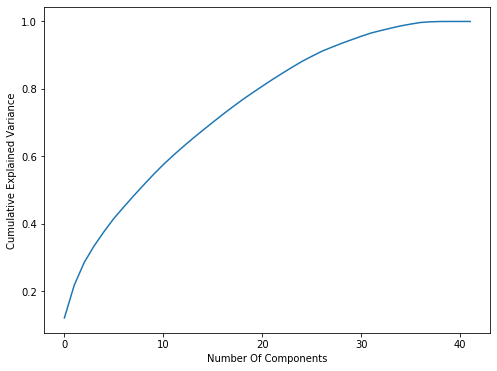

In [37]:
pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X_scaled)
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [38]:
col = list(X.columns)
df_pca = pd.DataFrame(
    {
        'PC1':pca.components_[0],
        'PC2':pca.components_[1],
        'PC3':pca.components_[2],
        'Feature':col
    }
)
df_pca.head(10)

# Import features

,PC1,PC2,PC3,Feature
0,0.218824,0.366047,0.089428,arpu_8
1,-0.011420,0.266935,0.139767,onnet_mou_8
2,0.046600,0.356001,0.062267,offnet_mou_8
3,0.025247,0.050774,-0.020624,roam_ic_mou_8
4,0.026385,0.093430,0.001463,roam_og_mou_8
5,0.041160,0.146265,-0.013807,loc_og_t2t_mou_8
6,0.089988,0.231764,-0.109430,loc_og_t2m_mou_8
7,0.071568,0.099211,-0.159253,loc_og_t2f_mou_8
8,0.007307,0.056289,0.123391,loc_og_t2c_mou_8
9,-0.038781,0.214575,0.168638,std_og_t2t_mou_8


In [39]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 12.03,  21.77,  28.47,  33.39,  37.62,  41.54,  44.94,  48.26,
        51.45,  54.59,  57.53,  60.26,  62.85,  65.34,  67.73,  70.08,
        72.4 ,  74.63,  76.79,  78.82,  80.8 ,  82.74,  84.59,  86.4 ,
        88.14,  89.67,  91.14,  92.35,  93.51,  94.58,  95.63,  96.59,
        97.33,  98.03,  98.7 ,  99.23,  99.7 ,  99.9 ,  99.99, 100.  ,
       100.  , 100.  ])

### Logistic Regression

In [40]:
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, train_size=0.7, random_state=1)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
model = lr.fit(x_train,y_train)

pred_probs_test = model.predict_proba(x_test)[:,1]
print("Linear Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

Linear Regression Accurancy : 0.88


### Tree Model

In [41]:
tree_filtered_df = filtered_df.copy()
Y = tree_filtered_df["churn"]
X = tree_filtered_df.drop(["churn","mobile_number"],axis=1)

scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, train_size=0.7, random_state=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_predictions = rfc.predict(x_test)
accuracy = round(accuracy_score(y_test,y_predictions),2)
accuracy

0.94

### Observations

Important features suggsted by model has impact on customer churn behavior
* Average revenue per user has impacted (arpu)
* Incoming and Outgoing calls on roaming ( roam_ic, roam_og)
* Local Outgoing call - Fixed Landline, Call center ( loc_og_t2t, loc_og_t2f, loc_og_t2c )
* Std Outgoing (std_og)
* onnet and offnet monthly usage